In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/POWER_Point_Daily_19820101_20221231_022d2604N_084d8536E_LST.csv', skiprows= 14)

In [3]:
df.head()

,YEAR,MO,DY,T2MDEW,PRECTOTCORR,PS,WS10M,T2M_MAX,T2M_MIN
0,1982,1,1,5.73,0.0,97.07,2.85,25.39,9.76
1,1982,1,2,5.43,0.0,96.91,2.49,26.40,9.30
2,1982,1,3,5.94,0.0,96.85,2.27,27.38,11.16
3,1982,1,4,6.79,0.0,96.93,1.44,28.37,11.58
4,1982,1,5,8.90,0.0,96.96,1.62,28.14,13.01


In [4]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['date'] = df['DY'].str.cat(df['MO'], sep = '/')
df['DATE'] = df['date'].str.cat(df['YEAR'], sep = '/')
#df.head()

In [5]:
df.index = pd.to_datetime(df['DATE'], format='%d/%m/%Y')
df
#df.head()

,YEAR,MO,DY,T2MDEW,PRECTOTCORR,PS,WS10M,T2M_MAX,T2M_MIN,date,DATE
DATE,,,,,,,,,,,
1982-01-01,1982,1,1,5.73,0.00,97.07,2.85,25.39,9.76,1/1,1/1/1982
1982-01-02,1982,1,2,5.43,0.00,96.91,2.49,26.40,9.30,2/1,2/1/1982
1982-01-03,1982,1,3,5.94,0.00,96.85,2.27,27.38,11.16,3/1,3/1/1982
1982-01-04,1982,1,4,6.79,0.00,96.93,1.44,28.37,11.58,4/1,4/1/1982
1982-01-05,1982,1,5,8.90,0.00,96.96,1.62,28.14,13.01,5/1,5/1/1982
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022,12,27,13.90,0.01,97.00,2.39,27.57,14.75,27/12,27/12/2022
2022-12-28,2022,12,28,11.67,0.00,97.07,2.55,26.96,13.01,28/12,28/12/2022
2022-12-29,2022,12,29,4.94,0.00,97.25,2.56,25.30,9.65,29/12,29/12/2022


In [6]:
df.describe()

,T2MDEW,PRECTOTCORR,PS,WS10M,T2M_MAX,T2M_MIN
count,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000
mean,14.480891,3.528598,96.076918,2.531599,31.438613,19.213923
std,16.685339,16.255455,15.512871,14.219991,15.644387,15.557066
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,7.900000,0.000000,95.800000,1.990000,27.760000,14.270000
50%,15.650000,0.120000,96.310000,2.540000,29.930000,21.760000
75%,23.340000,3.775000,96.820000,3.250000,35.505000,24.080000
max,26.190000,105.610000,97.630000,13.040000,47.270000,32.090000


In [7]:
df['T2M_MAX'] = df.T2M_MAX.astype(float)
df['T2M_MIN'] = df.T2M_MIN.astype(float)
df['T2MDEW'] = df.T2MDEW.astype(float)
df['PRECTOTCORR'] = df.PRECTOTCORR.astype(float)
df['WS10M'] = df.WS10M.astype(float)
df['PS'] = df.PS.astype(float)

# df[df['T2M_MIN'] == -999]

In [8]:
df.replace(-999.000000, np.nan, inplace = True)

df.isna().sum().sum()

18

In [9]:
df.interpolate(axis = 0, inplace = True)
df
df.drop(columns=['YEAR','MO','DY','date', 'DATE'], axis = 1, inplace = True)
df.head()

,T2MDEW,PRECTOTCORR,PS,WS10M,T2M_MAX,T2M_MIN
DATE,,,,,,
1982-01-01,5.73,0.0,97.07,2.85,25.39,9.76
1982-01-02,5.43,0.0,96.91,2.49,26.40,9.30
1982-01-03,5.94,0.0,96.85,2.27,27.38,11.16
1982-01-04,6.79,0.0,96.93,1.44,28.37,11.58
1982-01-05,8.90,0.0,96.96,1.62,28.14,13.01


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)
df_scaled[0]


array([0.55229759, 0.        , 0.82608696, 0.18545164, 0.27693325,
       0.25067114])

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_scaled, test_size = 0.2, shuffle = False)

X_1, y_1, X_test, y_test = [], [], [], []
for i in range(1,len(train)):
  X_1.append(train[i-1])
  y_1.append(train[i])
for i in range(1,len(test)-1):
  X_test.append(test[i-1])
  y_test.append(test[i])

In [12]:
X_train, y_train = X_1[:9500], y_1[:9500]
X_val, y_val = X_1[9500:], y_1[9500:]

In [13]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,0.552298,0.0,0.826087,0.185452,0.276933,0.250671
1,0.545733,0.0,0.776398,0.156675,0.310311,0.235235
2,0.556893,0.0,0.757764,0.139089,0.342697,0.297651
3,0.575492,0.0,0.782609,0.072742,0.375413,0.311745
4,0.621663,0.0,0.791925,0.087130,0.367812,0.359732
...,...,...,...,...,...,...
9495,0.488403,0.0,0.776398,0.181455,0.255453,0.165772
9496,0.445733,0.0,0.804348,0.144684,0.258427,0.139262
9497,0.460613,0.0,0.835404,0.107914,0.272637,0.153020
9498,0.543982,0.0,0.860248,0.133493,0.308989,0.210738


In [14]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.545733,0.000000,0.776398,0.156675,0.310311,0.235235
1,0.556893,0.000000,0.757764,0.139089,0.342697,0.297651
2,0.575492,0.000000,0.782609,0.072742,0.375413,0.311745
3,0.621663,0.000000,0.791925,0.087130,0.367812,0.359732
4,0.638950,0.048291,0.819876,0.115907,0.236946,0.423490
...,...,...,...,...,...,...
9495,0.445733,0.000000,0.804348,0.144684,0.258427,0.139262
9496,0.460613,0.000000,0.835404,0.107914,0.272637,0.153020
9497,0.543982,0.000000,0.860248,0.133493,0.308989,0.210738
9498,0.607659,0.000000,0.869565,0.146283,0.302379,0.260067


In [15]:
pd.DataFrame(X_val)

,0,1,2,3,4,5
0,0.619912,0.000000,0.872671,0.155076,0.319564,0.277181
1,0.601094,0.000000,0.875776,0.125500,0.320225,0.269799
2,0.572648,0.000000,0.872671,0.179856,0.355254,0.254362
3,0.585777,0.000000,0.854037,0.174261,0.381692,0.262752
4,0.588621,0.000000,0.819876,0.161471,0.382683,0.280537
...,...,...,...,...,...,...
2474,0.926039,0.017044,0.677019,0.338929,0.385658,0.680537
2475,0.928009,0.000000,0.754658,0.101519,0.409451,0.672483
2476,0.883589,0.004640,0.754658,0.118305,0.381031,0.584228
2477,0.859956,0.000947,0.760870,0.091127,0.395902,0.564430


In [16]:
pd.DataFrame(y_val)

,0,1,2,3,4,5
0,0.601094,0.000000,0.875776,0.125500,0.320225,0.269799
1,0.572648,0.000000,0.872671,0.179856,0.355254,0.254362
2,0.585777,0.000000,0.854037,0.174261,0.381692,0.262752
3,0.588621,0.000000,0.819876,0.161471,0.382683,0.280537
4,0.619475,0.000000,0.779503,0.121503,0.367151,0.381544
...,...,...,...,...,...,...
2474,0.928009,0.000000,0.754658,0.101519,0.409451,0.672483
2475,0.883589,0.004640,0.754658,0.118305,0.381031,0.584228
2476,0.859956,0.000947,0.760870,0.091127,0.395902,0.564430
2477,0.862144,0.000000,0.742236,0.090328,0.390615,0.551678


In [17]:
pd.DataFrame(X_test)

,0,1,2,3,4,5
0,0.811597,0.000000,0.751553,0.093525,0.368804,0.501342
1,0.798906,0.000000,0.788820,0.076739,0.374422,0.489262
2,0.796280,0.000000,0.801242,0.081535,0.351619,0.501342
3,0.777681,0.000000,0.767081,0.041567,0.349306,0.500000
4,0.780744,0.000000,0.739130,0.039169,0.335757,0.484564
...,...,...,...,...,...,...
2988,0.681400,0.000000,0.763975,0.140687,0.347654,0.362081
2989,0.706127,0.000000,0.816770,0.124700,0.343688,0.383893
2990,0.731072,0.000095,0.804348,0.148681,0.348976,0.418121
2991,0.682276,0.000000,0.826087,0.161471,0.328817,0.359732


In [18]:
pd.DataFrame(y_test)

,0,1,2,3,4,5
0,0.798906,0.000000,0.788820,0.076739,0.374422,0.489262
1,0.796280,0.000000,0.801242,0.081535,0.351619,0.501342
2,0.777681,0.000000,0.767081,0.041567,0.349306,0.500000
3,0.780744,0.000000,0.739130,0.039169,0.335757,0.484564
4,0.803063,0.014014,0.754658,0.079936,0.269002,0.542953
...,...,...,...,...,...,...
2988,0.706127,0.000000,0.816770,0.124700,0.343688,0.383893
2989,0.731072,0.000095,0.804348,0.148681,0.348976,0.418121
2990,0.682276,0.000000,0.826087,0.161471,0.328817,0.359732
2991,0.535011,0.000000,0.881988,0.162270,0.273959,0.246980


In [19]:
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_val , y_val = np.array(X_val), np.array(y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((9500, 6), (9500, 6), (2993, 6), (2993, 6), (2479, 6), (2479, 6))

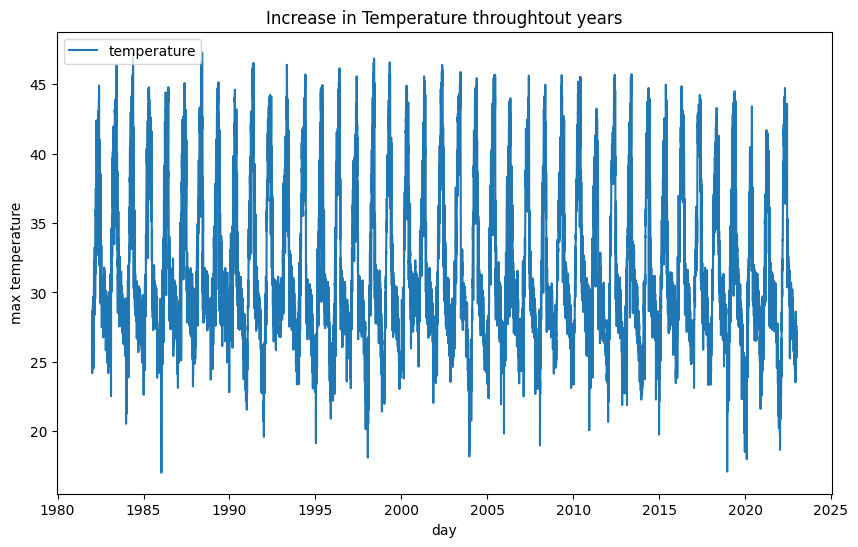

In [20]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(df['T2M_MAX'])

plt.title('Increase in Temperature throughtout years')
plt.xlabel('day')
plt.ylabel('max temperature')
plt.legend(['temperature'], loc = 'upper left')
plt.show()

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [22]:
model = Sequential()
model.add(Dense(6, input_dim = 6, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(6))
model.summary()

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 5,040
Trainable params: 5,040
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size =10, epochs = 50, shuffle =False)

Epoch 1/50
950/950 [==============================] - 4s 3ms/step - loss: 0.0117 - accuracy: 0.7915 - val_loss: 0.0044 - val_accuracy: 0.8221
Epoch 2/50
950/950 [==============================] - 2s 2ms/step - loss: 0.0059 - accuracy: 0.8737 - val_loss: 0.0085 - val_accuracy: 0.7785
Epoch 3/50
950/950 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 0.8594 - val_loss: 0.0043 - val_accuracy: 0.8971
Epoch 4/50
950/950 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.8885 - val_loss: 0.0044 - val_accuracy: 0.8951
Epoch 5/50
950/950 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 0.8718 - val_loss: 0.0049 - val_accuracy: 0.8693
Epoch 6/50
950/950 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.8761 - val_loss: 0.0046 - val_accuracy: 0.8689
Epoch 7/50
950/950 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 0.8776 - val_loss: 0.0037 - val_accuracy: 0.8766
Epoch 

In [24]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred =  pd.DataFrame(scaler.inverse_transform(y_test))
results = pd.DataFrame(y_pred)
pd.concat([actual_y_pred, results], axis = 1 )

94/94 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,0,1,2,3,4,5
0,17.00,0.00,96.95,1.49,28.34,16.87,17.533701,1.281355,96.823174,1.888907,27.211393,16.610428
1,16.88,0.00,96.99,1.55,27.65,17.23,17.063141,1.113345,96.909653,1.784915,26.847654,16.156416
2,16.03,0.00,96.88,1.05,27.58,17.19,17.080013,1.009653,96.946869,1.775906,26.568991,16.000622
3,16.17,0.00,96.79,1.02,27.17,16.73,17.092529,1.154861,96.916145,1.672987,26.852671,16.543493
4,17.19,1.48,96.84,1.53,25.15,18.47,17.209272,1.241243,96.866898,1.708770,26.867252,16.560780
...,...,...,...,...,...,...,...,...,...,...,...,...
2988,12.76,0.00,97.04,2.09,27.41,13.73,11.598848,0.879934,96.891502,2.277850,26.329863,12.653068
2989,13.90,0.01,97.00,2.39,27.57,14.75,12.420928,0.820925,97.007065,2.127126,25.804743,12.717962
2990,11.67,0.00,97.07,2.55,26.96,13.01,13.343524,0.812612,96.964981,2.303484,26.313547,13.516324
2991,4.94,0.00,97.25,2.56,25.30,9.65,11.407949,0.779045,97.025566,2.374089,25.557968,11.843377


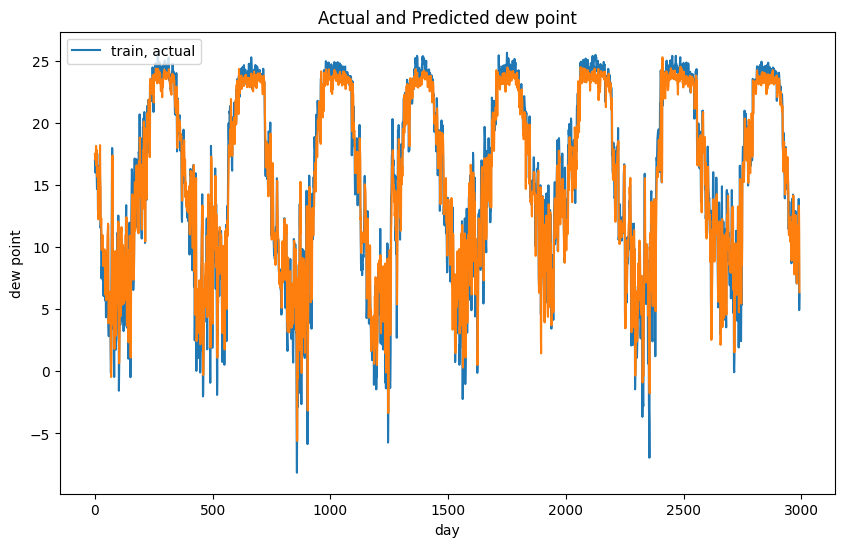

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[0])
plt.plot(results[0])

plt.title('Actual and Predicted dew point')
plt.xlabel('day')
plt.ylabel('dew point')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

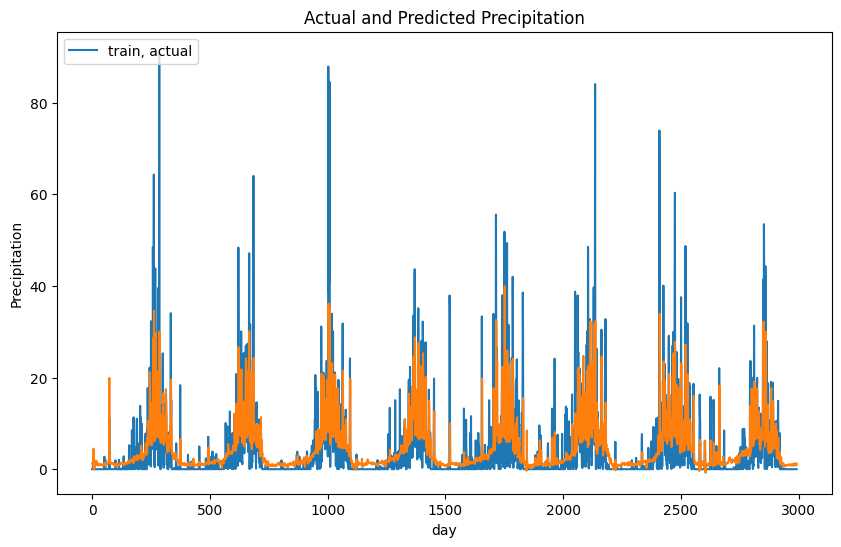

In [26]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[1])
plt.plot(results[1])

plt.title('Actual and Predicted Precipitation')
plt.xlabel('day')
plt.ylabel('Precipitation')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

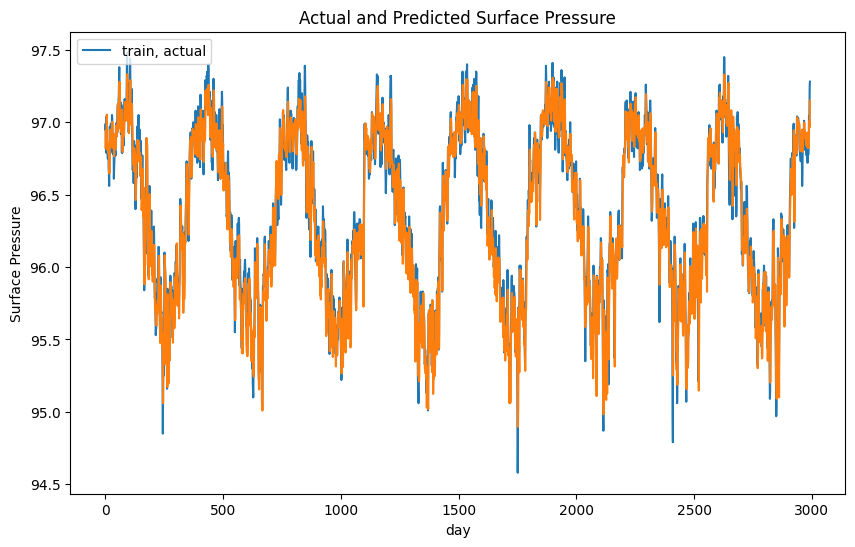

In [27]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[2])
plt.plot(results[2])

plt.title('Actual and Predicted Surface Pressure')
plt.xlabel('day')
plt.ylabel('Surface Pressure')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

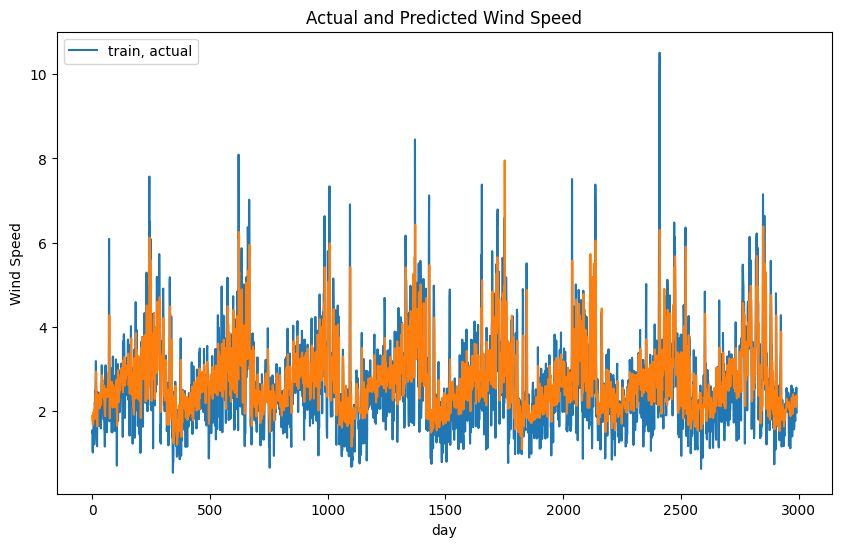

In [28]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[3])
plt.plot(results[3])

plt.title('Actual and Predicted Wind Speed')
plt.xlabel('day')
plt.ylabel('Wind Speed')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

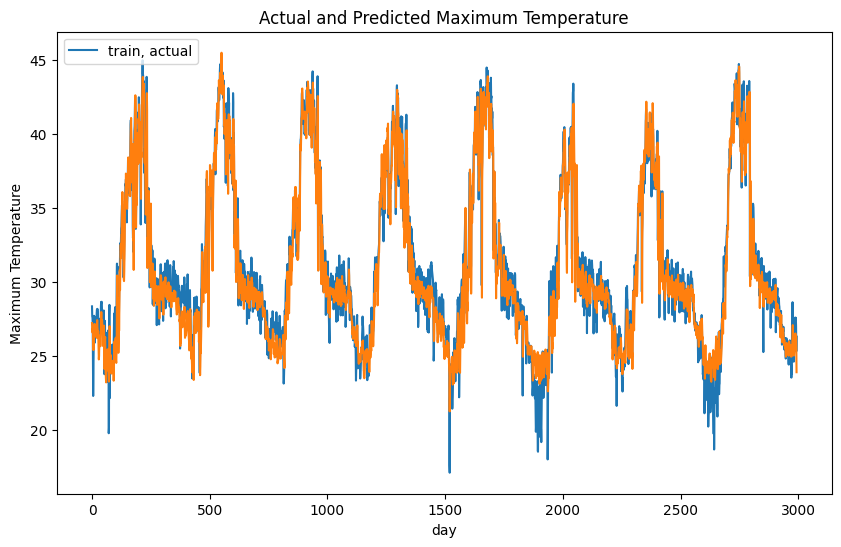

In [29]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[4])
plt.plot(results[4])

plt.title('Actual and Predicted Maximum Temperature')
plt.xlabel('day')
plt.ylabel('Maximum Temperature')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

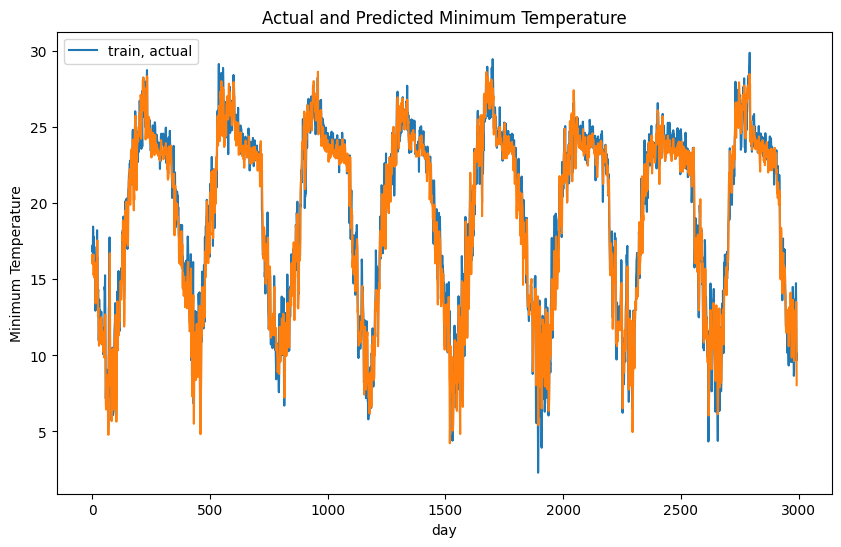

In [30]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(actual_y_pred[5])
plt.plot(results[5])

plt.title('Actual and Predicted Minimum Temperature')
plt.xlabel('day')
plt.ylabel('Minimum Temperature')
plt.legend(['train, actual'], loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

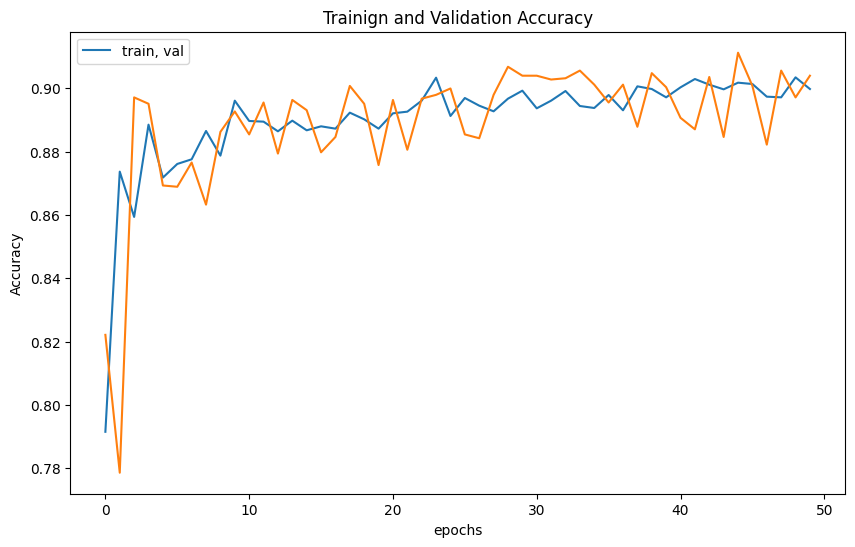

In [31]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Trainign and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train, val'], loc = 'upper left')
plt.show

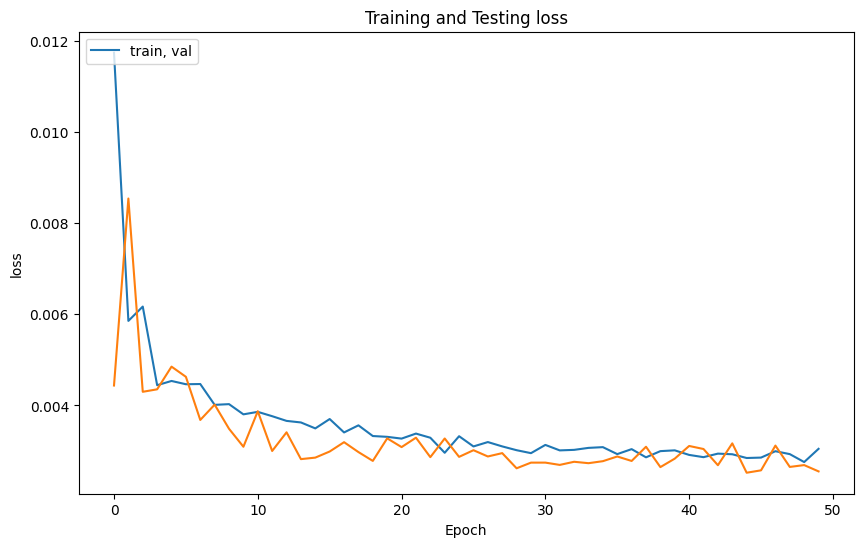

In [32]:
###
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Testing loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train, val'], loc = 'upper left')
plt.show()
###

In [33]:
print('Actual values')
print('T2MDEW PROTECTOTCORR PS WS10 T2M_MAX T2M_MAX')
print(pd.DataFrame(actual_y_pred))

print('predicted vales')
print('T2MDEW PROTECTOTCORR PS WS10 T2M_MAX T2M_MAX')
print(pd.DataFrame(results))

Actual values
T2MDEW PROTECTOTCORR PS WS10 T2M_MAX T2M_MAX
          0     1      2     3      4      5
0     17.00  0.00  96.95  1.49  28.34  16.87
1     16.88  0.00  96.99  1.55  27.65  17.23
2     16.03  0.00  96.88  1.05  27.58  17.19
3     16.17  0.00  96.79  1.02  27.17  16.73
4     17.19  1.48  96.84  1.53  25.15  18.47
...     ...   ...    ...   ...    ...    ...
2988  12.76  0.00  97.04  2.09  27.41  13.73
2989  13.90  0.01  97.00  2.39  27.57  14.75
2990  11.67  0.00  97.07  2.55  26.96  13.01
2991   4.94  0.00  97.25  2.56  25.30   9.65
2992   6.23  0.00  97.28  1.97  26.29  10.12

[2993 rows x 6 columns]
predicted vales
T2MDEW PROTECTOTCORR PS WS10 T2M_MAX T2M_MAX
              0         1          2         3          4          5
0     17.533701  1.281355  96.823174  1.888907  27.211393  16.610428
1     17.063141  1.113345  96.909653  1.784915  26.847654  16.156416
2     17.080013  1.009653  96.946869  1.775906  26.568991  16.000622
3     17.092529  1.154861  96.916145  1

In [34]:
scores = model.evaluate(actual_y_pred, results, verbose = 0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


In [35]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = False)

results = []
for tr, tt in cv.split(X_train, y_train):
  model.fit(X_train[tr], y_train[tr])

  prediction = model.predict(X_train[tt])
  results.append((prediction, tt))

30/30 [==============================] - 0s 1ms/step


In [37]:
input_data = []
print('Enter the weather parameters of previous days: ')

attr1 = float(input("Enter humidity: "))
attr2 = float(input("Enter precipitation: "))
attr3 = float(input("Enter surface pressure: "))
attr4 = float(input("Enter wind speed: "))
attr5 = float(input("Enter Maximum temp: "))
attr6 = float(input("Enter Minimum temp: "))

input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr4)
input_data.append(attr5)
input_data.append(attr6)

input_data = np.array(input_data)
input_data.shape = (1,6)
print('Input Data', input_data)
input_data = scaler.transform(input_data)

pred1 = model.predict(input_data)
pred2 = scaler.inverse_transform(pred1)
pd.DataFrame(pred2)


Enter the weather parameters of previous days: 
Enter humidity: 0.48
Enter precipitation: 0
Enter surface pressure: 97
Enter wind speed: 4
Enter Maximum temp: 35
Enter Minimum temp: 31
Input Data [[ 0.48  0.   97.    4.   35.   31.  ]]
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5
0,3.068011,0.121221,97.011208,3.017629,39.213139,21.204159
